# Linear Regression
This is a short demo of performing a linear regression in Python. It uses the `advertising` data from [this book](http://www-bcf.usc.edu/~gareth/ISL/data.html).

# Set up

In [6]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [7]:
# Load the data
advertising = pd.read_csv('data/Advertising.csv')
advertising.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Exploratory Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E52BBE10F0>]], dtype=object)

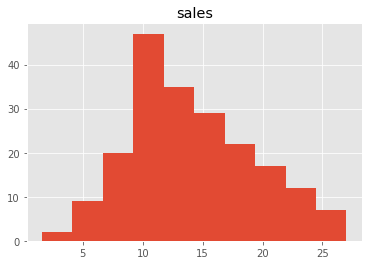

In [5]:
# What is the distrubution of sales?
advertising.hist('sales')

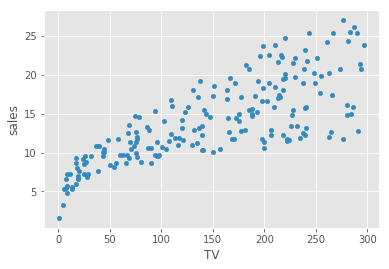

In [8]:
# Does there appear to be a correlation between TV spending and sales?
advertising.plot('TV', 'sales', kind="scatter")

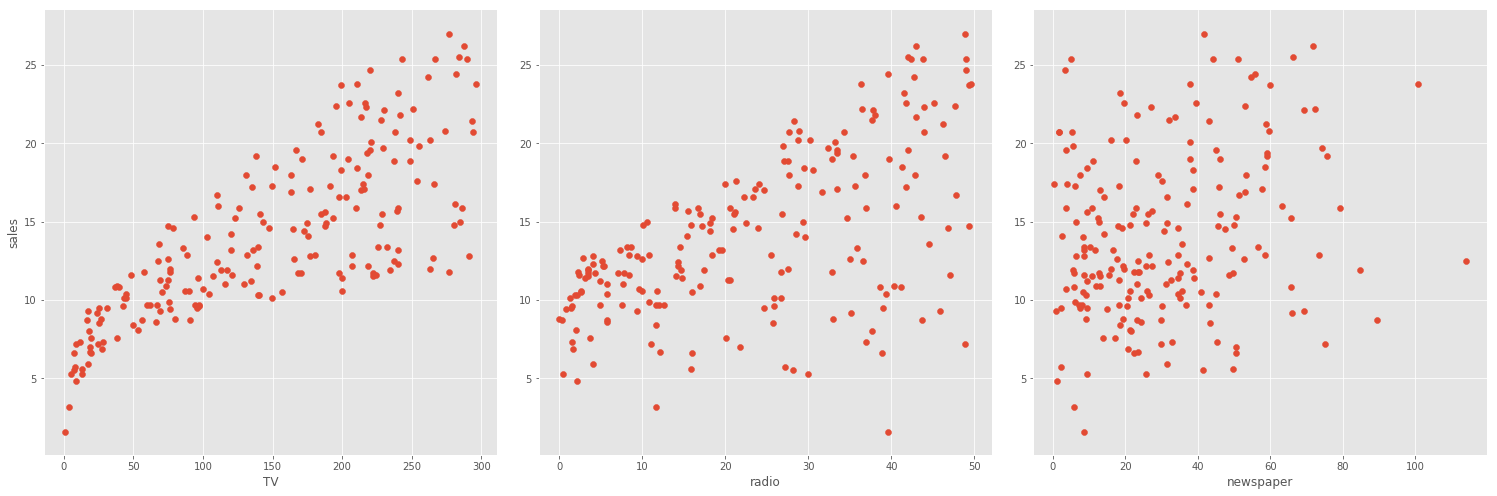

In [12]:
# Let's do this check for each independent variable
g = sns.PairGrid(advertising,
                 x_vars=["TV", "radio", "newspaper"],
                 y_vars=["sales"],
                 size=7
)
g.map(plt.scatter)
plt.show()

# Simple linear regression
What is the sales increase associated with each dollar increase in the radio budget?

In [13]:
# Create model
lm = smf.ols(formula = "sales ~ radio", data=advertising)

In [15]:
# Summarize the model results
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           4.35e-19
Time:                        17:05:36   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assess the fit of your model:

- Describe the _accuracy of your coefficient estimates_. What are your interpretations of the **betas**, their **standard errors**, and their **confidence intervals** for your model?
- Describe the _accuracy of your model_. What is your interpretation of the **R-squared** value?

In [17]:
# Create a `simple_pred` column of your dataframe by making predictions from your linear model
advertising['simple_pred'] = lm.fit().predict()

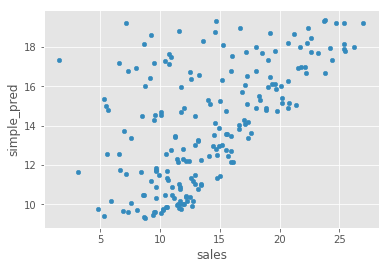

In [18]:
# Visually compare your predictions to the actual data
advertising.plot('sales', 'simple_pred', kind="scatter")

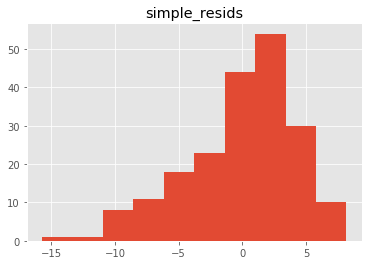

In [19]:
# What is the distrubution of the residuals?
advertising['simple_resids'] = advertising.sales - advertising.simple_pred
advertising.hist('simple_resids')
plt.show()

# Multiple Regression
Let's build a model of all 3 predictors (`TV`, `radio`, and `newspaper`) and see how much **variance** we can explain in our outcome.

In [21]:
# Create a model
full_model = smf.ols('sales ~ TV + radio + newspaper', data=advertising).fit()

In [22]:
# Summarize the model
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           1.58e-96
Time:                        17:13:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assess the fit of your model:

- Describe the _accuracy of your coefficient estimates_. What are your interpretations of the **betas**, their **standard errors**, and their **confidence intervals** for your model?
- Describe the _accuracy of your model_. What is your interpretation of the **R-squared** value?

In [23]:
# Make predictions
advertising['preds'] = full_model.predict()

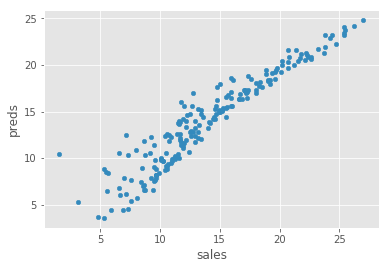

In [24]:
# Visualize results
advertising.plot('sales', 'preds', kind="scatter")

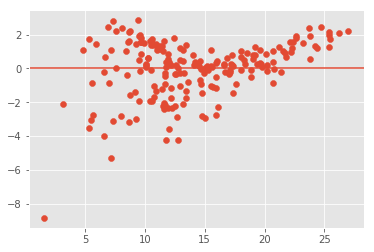

In [26]:
# Plot sales against residuals
plt.scatter(advertising.sales, advertising.sales-advertising.preds)
plt.axhline(0)